<a href="https://colab.research.google.com/github/djibril64/README/blob/main/Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
!unzip /content/drive/MyDrive/face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [35]:
!pip install keras


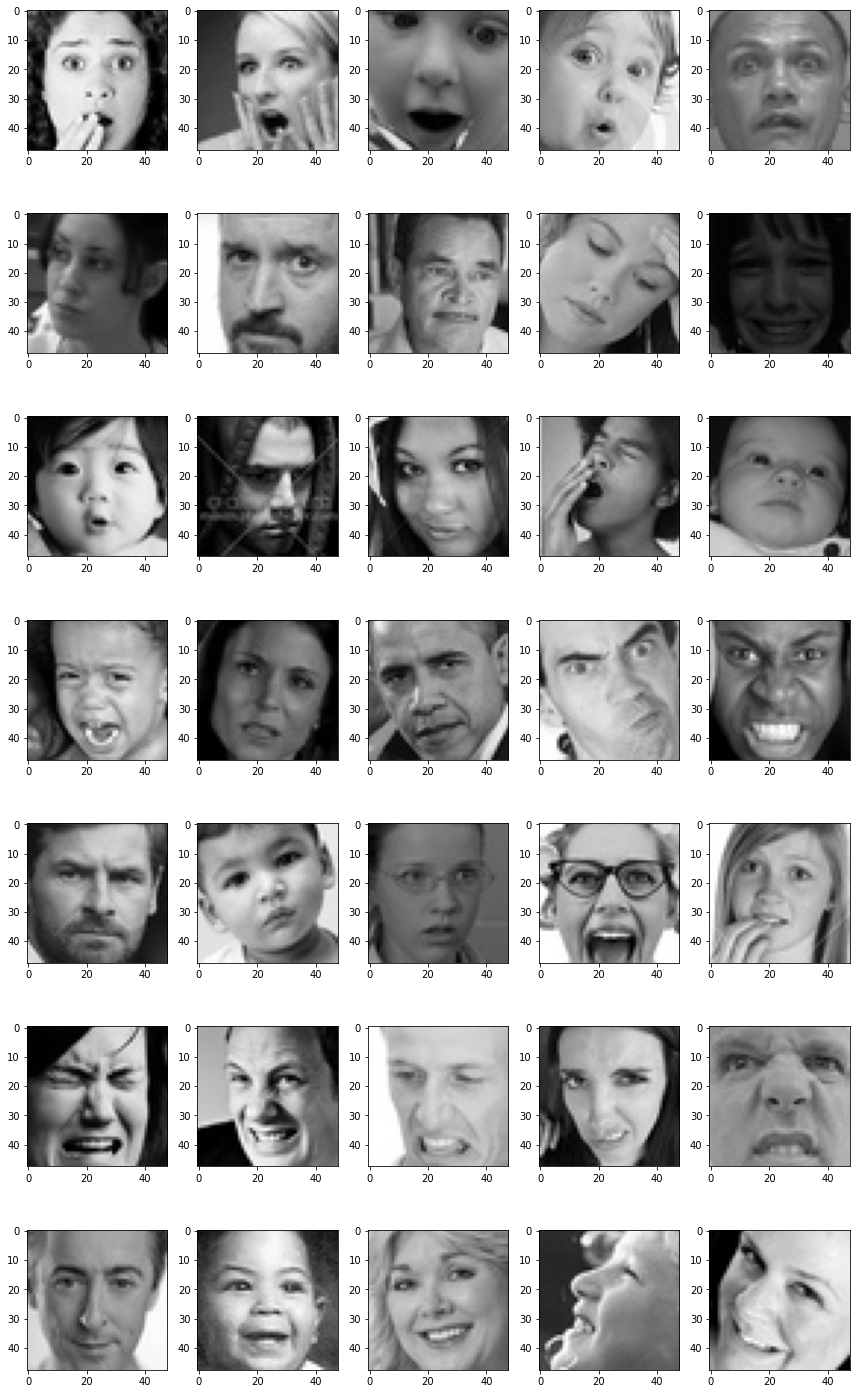

In [36]:
# This will display some images for every different expression

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "../content/drive/MyDrive/face-expression-recognition-dataset/images/images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()





In [37]:
GDRIVEPATH='/content/drive/MyDrive/face-expression-recognition-dataset/images/images'

In [38]:
import keras
import tensorflow as tf
import pandas as pd
from tensorflow.compat.v1.keras import backend as K
from tensorflow.python.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt

import os, shutil

base_dir = GDRIVEPATH

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


#Training class folder for disgust, happy, surprise, sad, and angry. 
train_disgust_dir = os.path.join(train_dir, 'disgust')          
train_happy_dir = os.path.join(train_dir, 'happy')              
train_surprise_dir = os.path.join(train_dir, 'surprise')        
train_sad_dir = os.path.join(train_dir, 'sad')                  
train_angry_dir = os.path.join(train_dir, 'angry')              

#Validation class folder for disgust, happy, surprise, sad, and angry. 
validation_disgust_dir = os.path.join(validation_dir, 'disgust')            
validation_happy_dir = os.path.join(validation_dir, 'happy')                
validation_surprise_dir = os.path.join(validation_dir, 'surprise')          
validation_sad_dir = os.path.join(validation_dir, 'sad')                   
validation_angry_dir = os.path.join(validation_dir, 'angry')                

#Testing class folder for disgust, happy, surprise, sad, and angry. 
test_disgust_dir = os.path.join(test_dir, 'disgust')                          
test_happy_dir = os.path.join(test_dir, 'happy')                  
test_surprise_dir = os.path.join(test_dir, 'surprise')            
test_sad_dir = os.path.join(test_dir, 'sad')                     
test_angry_dir = os.path.join(test_dir, 'angry')                  


In [39]:
#This is to print training label for disgust, happy, surprise, sad, and angry. 
print('Total training disgust images:', len(os.listdir(train_disgust_dir)))      
print('Total training happy images:', len(os.listdir(train_happy_dir)))          
print('Total training surprise images:', len(os.listdir(train_surprise_dir)))    
print('Total training sad images:', len(os.listdir(train_sad_dir)))              
print('Total training angry images:', len(os.listdir(train_angry_dir)))          


#This is to print validation label for disgust, happy, surprise, sad, and angry.           
print('Total validation  disgust images:', len(os.listdir(validation_disgust_dir)))     
print('Total validation  happy images:', len(os.listdir(validation_happy_dir)))         
print('Total validation  surprise images:', len(os.listdir(validation_surprise_dir)))   
print('Total validation  sad images:', len(os.listdir(validation_surprise_dir)))   
print('Total validation  angry images:', len(os.listdir(validation_angry_dir)))       


#This is to print testing label for disgust, happy, surprise, sad, and angry. 
print('Total test  disgust images:', len(os.listdir(test_disgust_dir)))       
print('Total test  happy images:', len(os.listdir(test_happy_dir)))         
print('Total test suprise images:', len(os.listdir(test_surprise_dir)))           
print('Total test sad images:', len(os.listdir(test_sad_dir)))    
print('Total test angry images:', len(os.listdir(test_angry_dir)))        



Total training disgust images: 436
Total training happy images: 7164
Total training surprise images: 3205
Total training sad images: 4938
Total training angry images: 3993
Total validation  disgust images: 111
Total validation  happy images: 1825
Total validation  surprise images: 797
Total validation  sad images: 797
Total validation  angry images: 960
Total test  disgust images: 111
Total test  happy images: 1835
Total test suprise images: 797
Total test sad images: 1139
Total test angry images: 960


In [41]:
from google.colab import drive
from google.colab import files
from keras import layers
from keras import models
import matplotlib.pyplot as plt
import numpy as np
from keras import optimizers
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 22, 22, 64)        8256      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 10, 10, 128)       32896     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 512)        

In [42]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical',
        color_mode= 'grayscale')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical',
        color_mode= 'grayscale')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [43]:
for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break
     

data batch shape: (64, 48, 48, 1)
labels batch shape: (64, 7)


In [44]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [46]:

# number of epochs to train the NN
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

RuntimeError: ignored

In [48]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


NameError: ignored